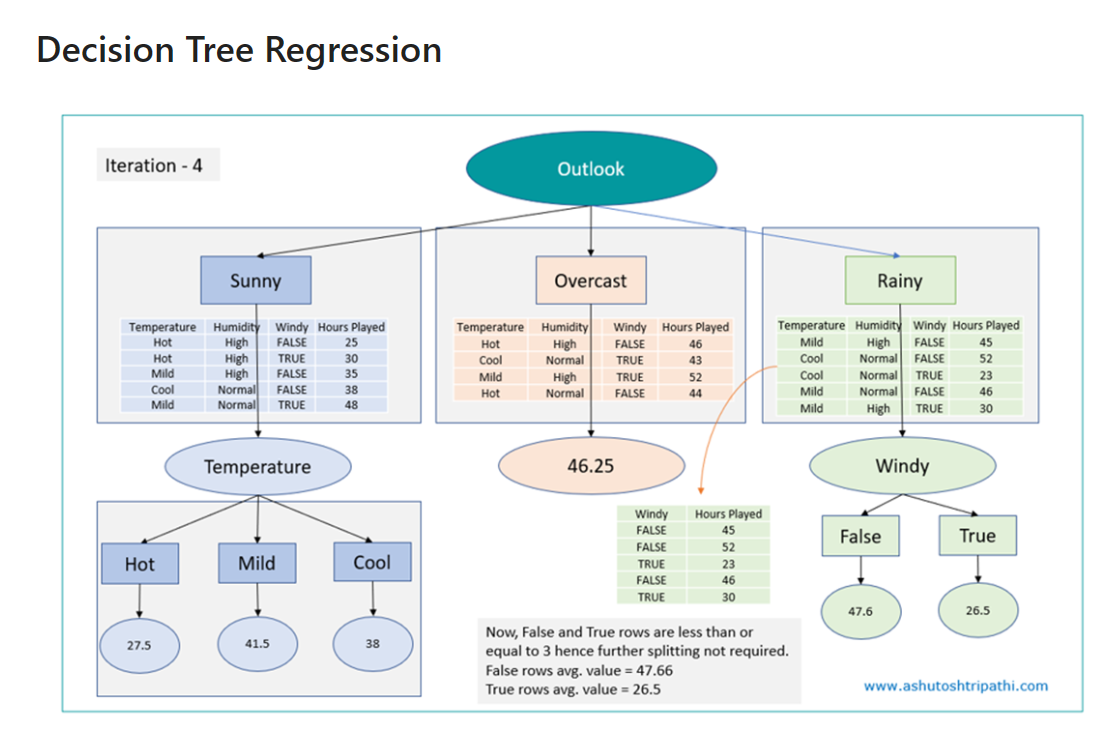

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

Read 50 Startups dataset

In [2]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


PROFIT ~ RND, ADMIN, MKT, STATE

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
df.duplicated().sum()

0

Seperate X and Y

In [6]:
X = df.drop(columns=['PROFIT'])
Y = df[['PROFIT']]

In [7]:
X.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [8]:
X.dtypes

RND      float64
ADMIN    float64
MKT      float64
STATE     object
dtype: object

In [9]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


Perform cat and con seperation on X

In [10]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [11]:
cat

['STATE']

In [12]:
con

['RND', 'ADMIN', 'MKT']

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [16]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore'))])

In [19]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)])

In [20]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['RND', 'ADMIN', 'MKT']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['STATE'])])

In [21]:
X_pre = pre.fit_transform(X)
X_pre[0:5]

array([[ 2.01641149,  0.56075291,  2.15394309,  0.        ,  0.        ,
         1.        ],
       [ 1.95586034,  1.08280658,  1.9236004 ,  1.        ,  0.        ,
         0.        ],
       [ 1.75436374, -0.72825703,  1.62652767,  0.        ,  1.        ,
         0.        ],
       [ 1.55478369, -0.09636463,  1.42221024,  0.        ,  0.        ,
         1.        ],
       [ 1.5049372 , -1.07991935,  1.28152771,  0.        ,  1.        ,
         0.        ]])

In [22]:
cols = pre.get_feature_names_out()
cols

array(['num__RND', 'num__ADMIN', 'num__MKT', 'cat__STATE_California',
       'cat__STATE_Florida', 'cat__STATE_New York'], dtype=object)

In [23]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


Apply train test split

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [25]:
xtrain.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
30,-0.258074,-0.205629,-0.990357,0.0,1.0,0.0
21,0.102724,1.169186,0.732788,0.0,0.0,1.0
19,0.279442,1.159837,-1.743127,0.0,0.0,1.0
11,0.593085,-1.065540,0.319834,1.0,0.0,0.0
22,0.006007,0.051850,0.762376,0.0,1.0,0.0


In [26]:
ytrain.head()

,PROFIT
30,99937.59
21,111313.02
19,122776.86
11,144259.40
22,110352.25


In [27]:
xtest.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
7,1.245057,0.871980,0.932186,0.0,1.0,0.0
44,-1.134305,1.206419,-1.509074,1.0,0.0,0.0
43,-1.281134,0.217682,-1.449605,0.0,0.0,1.0
25,-0.199312,0.656489,-0.603517,1.0,0.0,0.0
14,1.017181,1.269199,0.375742,0.0,1.0,0.0


In [28]:
ytest.head()

,PROFIT
7,155752.60
44,65200.33
43,69758.98
25,107404.34
14,132602.65


In [29]:
xtrain.shape

(40, 6)

In [30]:

xtest.shape

(10, 6)

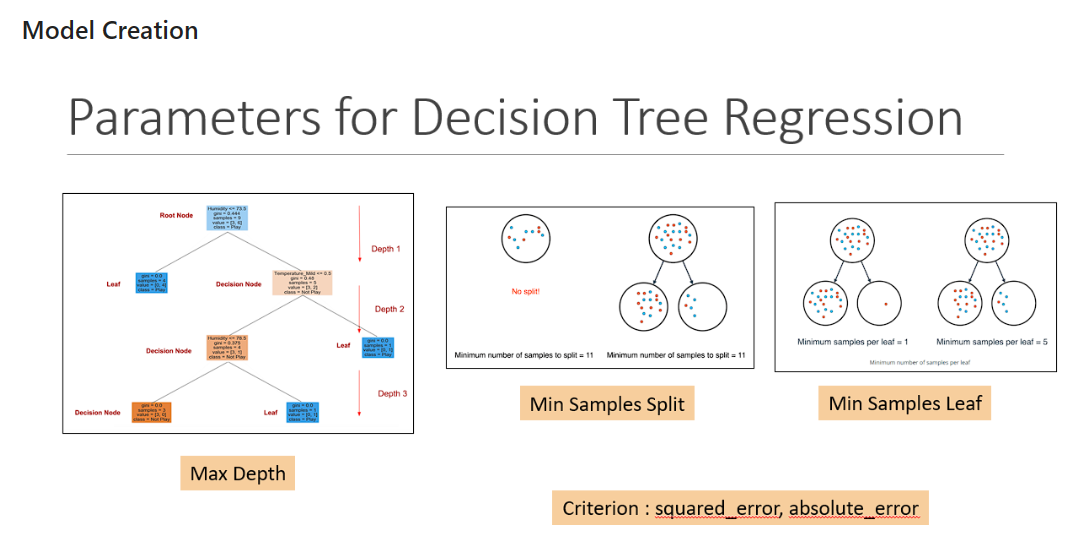

In [31]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=1, min_samples_split=5, min_samples_leaf=6, criterion='squared_error')
model.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=6, min_samples_split=5)

In [32]:
model.score(xtrain, ytrain)

0.6268054892550098

In [33]:
model.score(xtest, ytest)

0.6434222460818757

Hyperparameter tuning

In [34]:
params = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8],
          'min_samples_split':[5, 6, 7, 8, 9, 10],
          'min_samples_leaf':[3, 4, 5, 6, 7, 8],
          'criterion':['squared_error', 'absolute_error']}

In [35]:
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor()
gscv = GridSearchCV(dtr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [36]:
gscv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 6}

In [37]:
gscv.best_score_

-287275525.60288435

In [38]:
best_dtr = gscv.best_estimator_
best_dtr

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=3, min_samples_split=6)

In [39]:
best_dtr.score(xtrain, ytrain)

0.964491148172637

In [41]:
best_dtr.score(xtest, ytest)

0.9397388817493316

Predicting model results

In [42]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [43]:

ypred_tr[0:5]

array([ 85867.16826087, 148810.00882353, 148810.00882353, 148810.00882353,
        85867.16826087])

In [44]:
ytrain.head()

,PROFIT
30,99937.59
21,111313.02
19,122776.86
11,144259.40
22,110352.25


In [45]:
ypred_ts[0:5]

array([148810.00882353,  85867.16826087,  85867.16826087,  85867.16826087,
       148810.00882353])

In [46]:
ytest.head()

,PROFIT
7,155752.60
44,65200.33
43,69758.98
25,107404.34
14,132602.65


Check model mse, mae, rmse, r2

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_model(x, y, model):
    # predict train and test results
    ypred = model.predict(x)
    # Evaluate the model
    mse = mean_squared_error(y, ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print the results
    print(f'Mean Squared Error : {mse:.2f}')
    print(f'Root Mean Squared Error : {rmse:.2f}')
    print(f'Mean Absolute Error : {mae:.2f}')
    print(f'R2 Score : {r2:.4f}')

In [48]:
evaluate_model(xtrain, ytrain, best_dtr)

Mean Squared Error : 54847052.08
Root Mean Squared Error : 7405.88
Mean Absolute Error : 4473.23
R2 Score : 0.9645


Plotting the Decision Tree

In [49]:
best_dtr

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=3, min_samples_split=6)

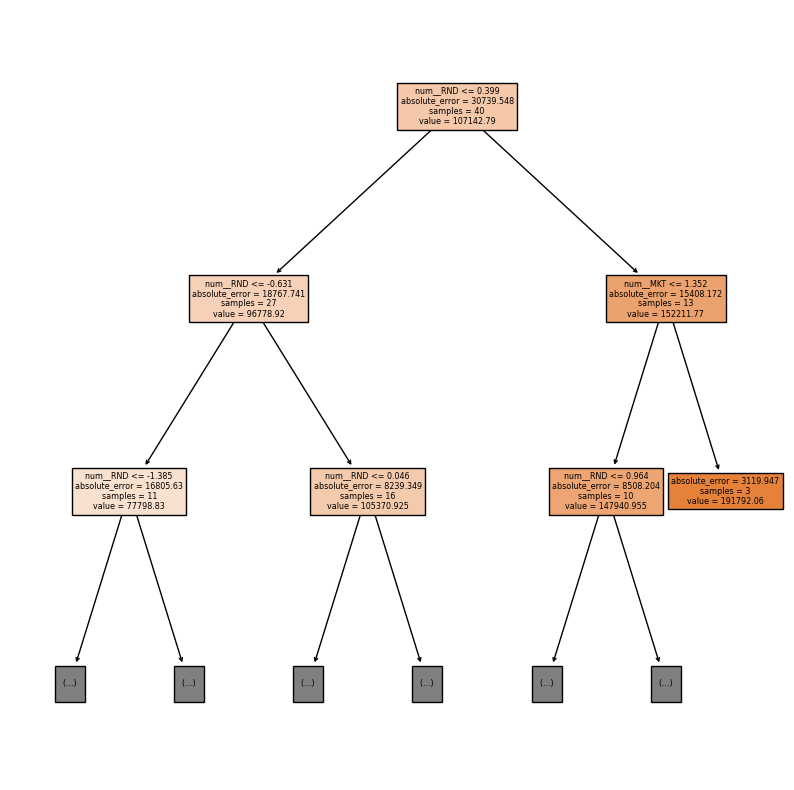

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(best_dtr, feature_names=xtrain.columns, filled=True, max_depth=2)
plt.show()

Plot feature importance

In [51]:
imp = best_dtr.feature_importances_
imp

array([0.87270778, 0.        , 0.11496285, 0.        , 0.        ,
       0.01232936])

In [52]:
xtrain.columns

Index(['num__RND', 'num__ADMIN', 'num__MKT', 'cat__STATE_California',
       'cat__STATE_Florida', 'cat__STATE_New York'],
      dtype='object')

In [53]:
imp = pd.Series(imp)
imp

0    0.872708
1    0.000000
2    0.114963
3    0.000000
4    0.000000
5    0.012329
dtype: float64

In [54]:
imp.index = xtrain.columns
imp

num__RND                 0.872708
num__ADMIN               0.000000
num__MKT                 0.114963
cat__STATE_California    0.000000
cat__STATE_Florida       0.000000
cat__STATE_New York      0.012329
dtype: float64

In [55]:
imp = imp.sort_values(ascending=False)
imp

num__RND                 0.872708
num__MKT                 0.114963
cat__STATE_New York      0.012329
num__ADMIN               0.000000
cat__STATE_California    0.000000
cat__STATE_Florida       0.000000
dtype: float64

<Axes: title={'center': 'Feature Importances'}>

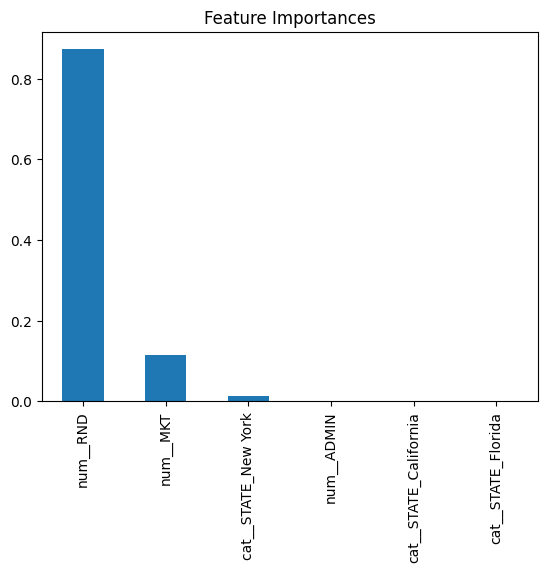

In [56]:
imp.plot(kind='bar', title='Feature Importances')

RND is most important feature to predict the PROFIT

Predicting out of sample data

In [57]:
xnew = pd.read_csv('test.csv')
xnew

,RND,ADMIN,MKT,STATE
0,78013.11,121597.55,264346.06,California
1,22177.74,154806.14,28334.72,California
2,23640.93,96189.63,148001.11,California
3,101913.08,110594.11,229160.95,Florida
4,77044.01,99281.34,140574.81,New York
5,542.05,51743.15,0.00,New York
6,61136.38,152701.92,88218.23,New York
7,100671.96,91790.61,249744.55,California
8,28663.76,127056.21,201126.82,Florida
9,20229.59,65947.93,185265.10,New York


In [58]:
xnew_pre = pre.transform(xnew)
xnew_pre[0:5]

array([[ 0.0944412 ,  0.00911842,  0.44044622,  1.        ,  0.        ,
         0.        ],
       [-1.13430539,  1.20641936, -1.50907418,  1.        ,  0.        ,
         0.        ],
       [-1.10210556, -0.90693753, -0.52059596,  1.        ,  0.        ,
         0.        ],
       [ 0.62039825, -0.38759909,  0.14980727,  0.        ,  1.        ,
         0.        ],
       [ 0.0731146 , -0.79546917, -0.5819393 ,  0.        ,  0.        ,
         1.        ]])

In [59]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,0.094441,0.009118,0.440446,1.0,0.0,0.0
1,-1.134305,1.206419,-1.509074,1.0,0.0,0.0
2,-1.102106,-0.906938,-0.520596,1.0,0.0,0.0
3,0.620398,-0.387599,0.149807,0.0,1.0,0.0
4,0.073115,-0.795469,-0.581939,0.0,0.0,1.0
5,-1.610433,-2.509409,-1.743127,0.0,0.0,1.0
6,-0.276958,1.130554,-1.014419,0.0,0.0,1.0
7,0.593085,-1.065540,0.319834,1.0,0.0,0.0
8,-0.991570,0.205925,-0.081763,0.0,1.0,0.0
9,-1.177178,-1.997270,-0.212785,0.0,0.0,1.0


In [60]:
preds = best_dtr.predict(xnew_pre)
preds

array([124266.9 ,  78019.37,  78019.37, 141585.52, 111313.02,  42582.08,
        96778.92, 141585.52,  89949.14,  89949.14,  42582.08, 141585.52,
        96778.92, 156122.51,  78019.37])

In [61]:
xnew['PROFIT_pred']=preds
xnew

,RND,ADMIN,MKT,STATE,PROFIT_pred
0,78013.11,121597.55,264346.06,California,124266.90
1,22177.74,154806.14,28334.72,California,78019.37
2,23640.93,96189.63,148001.11,California,78019.37
3,101913.08,110594.11,229160.95,Florida,141585.52
4,77044.01,99281.34,140574.81,New York,111313.02
5,542.05,51743.15,0.00,New York,42582.08
6,61136.38,152701.92,88218.23,New York,96778.92
7,100671.96,91790.61,249744.55,California,141585.52
8,28663.76,127056.21,201126.82,Florida,89949.14
9,20229.59,65947.93,185265.10,New York,89949.14


In [62]:
xnew.to_csv('Results.csv', index=False)